# Section 2: Introduction to ggplot2

This notebook introduces you to ggplot2. A lot of functions and arguments will be introduced, so it is remmended that you have a [cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) handy to access whenever it's necessary.

Note that there are many other approaches available for creating plots in R, such as functions like _plot_, _hist_ and _boxplot_, and other packages like _grid_ and _lattice_. We use ggplot2 in this course because it breaks plots into components in a way that permits beginners to create relatively complex and aesthetically pleasing plots using syntax that is intuitive and relatively easy to remember.

Also note that one limitation of ggplot is that it is designed to work exclusevely with data tables. In these data tables, rows have to be observations and columns have to be variables.

---
## Basics of ggplot2

We used ggplot2 a lot in the first notebook of this course. In this one, we will explore and understand everything we made with ggplot2, so that we can finally use it to visualize any data.

The ggplot2 package can be loaded, along with dplyr and other some useful packages, by loading the tidyverse library (it is also possible to load ggplot alone with the command `library(ggplot2)`, instead of loading the entire tidyverse):

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


As an example, we're going to construct a graph that summarizes the US murders dataset. In it, we'll be able to clearly see:

- how much states vary accross population size and the total number of murders;
- a clear relationship between murder totals and population size;
- the average murder rate in the entire US; and
- murder rates accross regions.

The first step is learning that ggplot2 is able to break a graph into components:

- data (in our case, the US murders dataset);
- geometry (examples: scatter, bar plot, histograms, smooth densities, q-q plots, boxplots, etc.);
- aesthetic mapping (examples: x-axis and y-axis values, colors, texts, etc.);
- scale (examples: log2, log10, etc.);
- labels, title, legends, style, etc.

In the following sub-sections, we will construct the plot piece by piece.

---
## Creating a New Plot

Before we start creating the graph, we will import the dataset:

In [2]:
library(dslabs)
data(murders)

The first step is creating a ggplot graph is to define a ggplot object, which we can do using the _ggplot_ function. It receives, as the first argument, the data that ust be associated with that object, in our case the murders dataset. We can initiate an object or pipe the data, as shown in the code cells below:

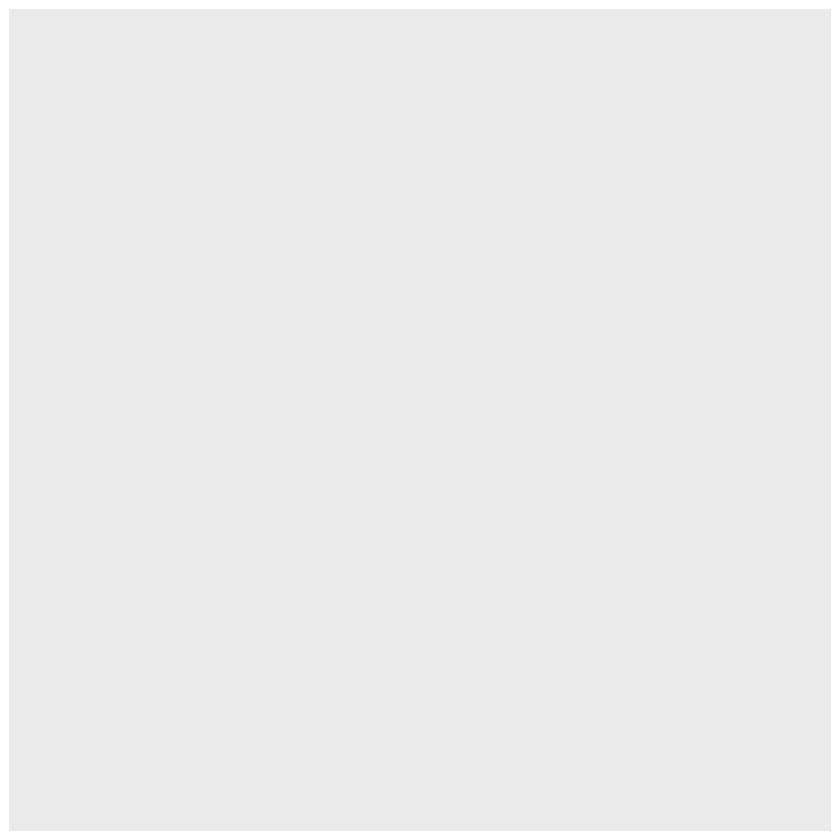

In [3]:
# Initiate an object
ggplot(data=murders)

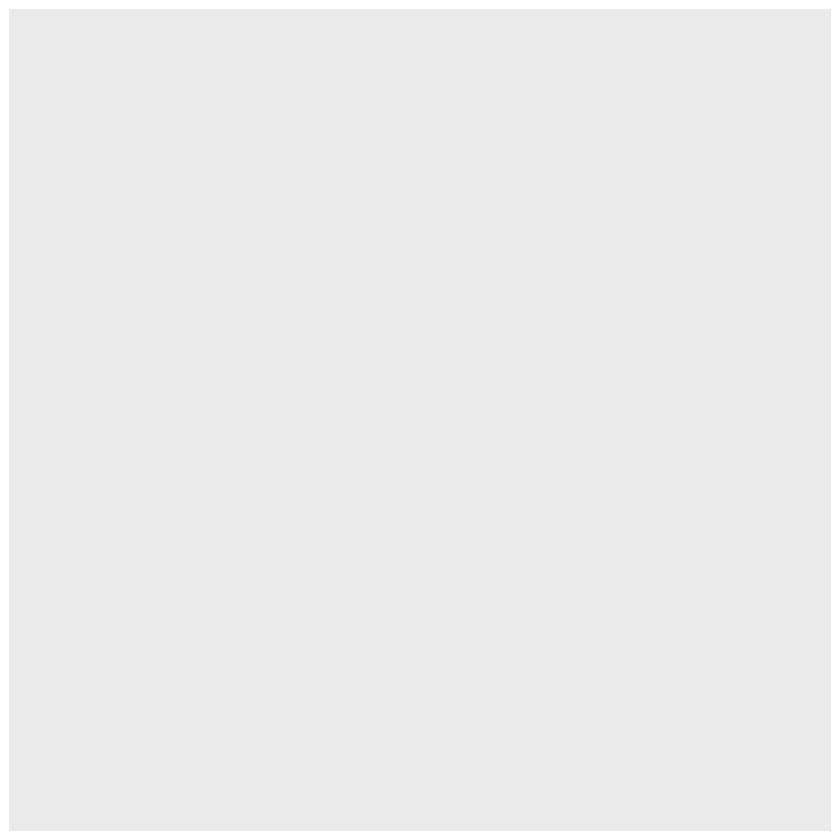

In [4]:
# Pipe the data
murders %>% ggplot()

The codes in the two cells above are equivalent. Note that both render a plot: a blank slate since no geometry has been defined with a grey background. We have created an object in both of them, and because it was not assigned, it was automatically evaluated.

To avoid this, we can define an object, just as follows:

In [5]:
p <- ggplot(data=murders)

If we look at the class of `p`, we'll see that it is a ggplot object:

In [6]:
class(p)

[1] "gg"     "ggplot"

To render the plot, we simply print `p`:

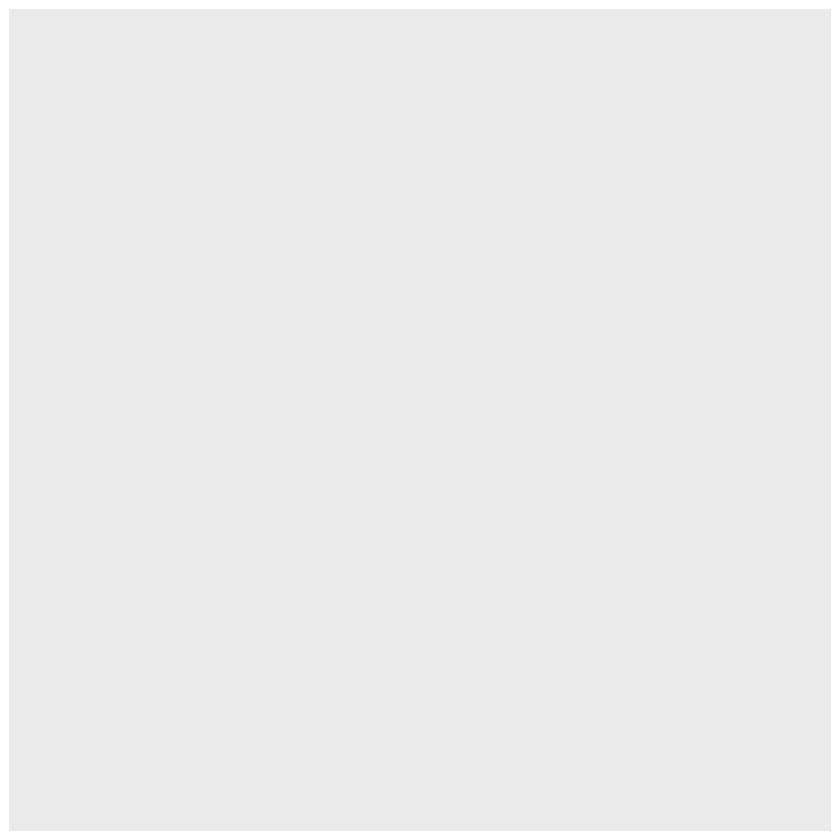

In [7]:
p

---
## Custominzing Plots

### Layers

In ggplot, we create graphs by adding layers, and we add them component by component. Layers can define geometries, compute summary statistics, define what scale to use and even change styles. To add a layer, we use the symbol `+`. In general, a line of code in ggplot will look like this:

`data %>% ggplot() + layer_1 + layer_2 + ... + layer_n`

Usually, the first added layer defines the geometry. In our example, we want to make a scatterplot. If we look at the cheat sheet indicated earlier, we can use the function *geom_point*. We will see that geometry function names follows this pattern: geom, underscore, a name that reminds the geometry we're about to add.

To tell the *geom_point* function what to do, we need o provide data and a mapping. Since we've already mapped our `p` object to the murders dataset, if we add a layer with *geom_point* function we will default use that data.

To find out what mappings are expected, we can read the help file of the function by executing the following code:

In [14]:
?geom_point

As we can see in the documentation, the required arguments in the aesthetics section are $x$ and $y$. These will be the x and y of the plot.

The function _aes_ will be one of the functions we will most use. It connects data with what we see on the graph, and we refer to this connection as aesthetic mappings. The output of this function is often used as an argument of a geometry function.

The following example produces a scatterplot of total murders versus population in millions:

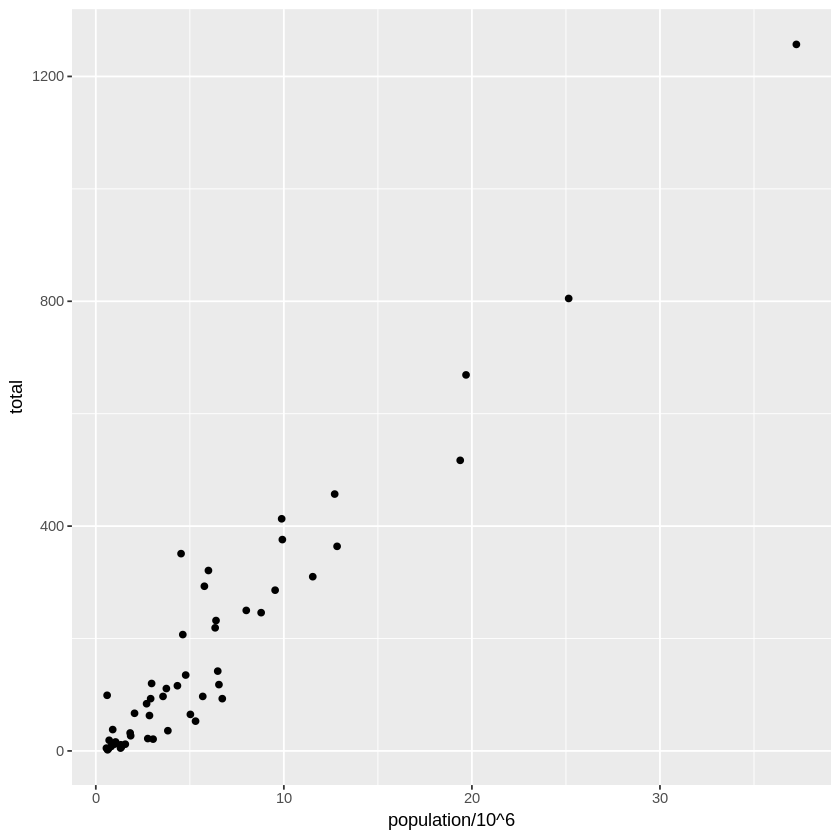

In [10]:
murders %>% ggplot() + 
    geom_point(aes(x=population/10^6, y=total))

Note that we can add layers to previously defined objects. In the code cell below, we add a layer to the `p` object we defined earlier (it will render the object because we are not assigning it to an object):

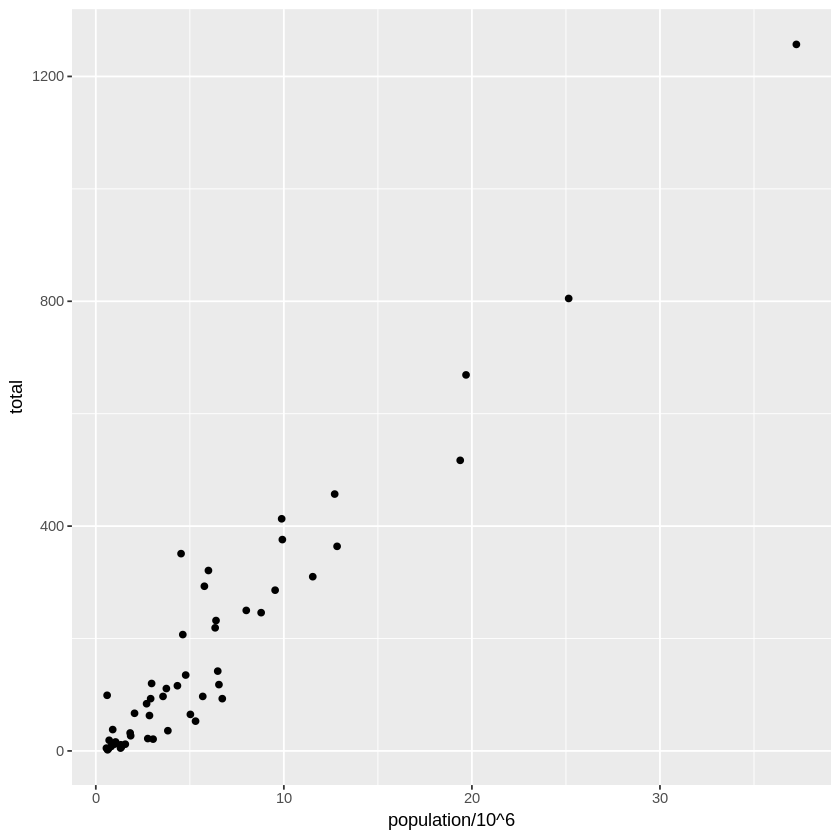

In [11]:
p + geom_point(aes(x=population/10^6, y=total))

Note also that the scales and labels are defined by default when adding this geometry layer.

Finally, notice that we use the variable names from the object component(population and total) to label the axes. Note that the _aes_ function recognizes the variable names from the data object. Keep in mind that this behavior is quite specific to _aes_. With most function, if you try to access the values of a dataset like this you will receive an error.

A second layer we wish to make involves adding a layer to each point. This will help us identify which point goes with which state. The *geom_label* and *geom_text* functions permit us to add text to the plot. The difference between these functions is that the first adds a label with a little rectangle while the second simply adds the text.

Because each point (that is, each state) has a label, we need an aesthetic mapping to make this connection. To find out how to do it with *geom_text*, we will read its help file:

In [16]:
?geom_text

The documentation tells us that the required arguments for the aesthetic mapping are the coordinates of each point and its label. Below, we will add the text layer that helps us identify the states (using the _abb_ column) in the plot:

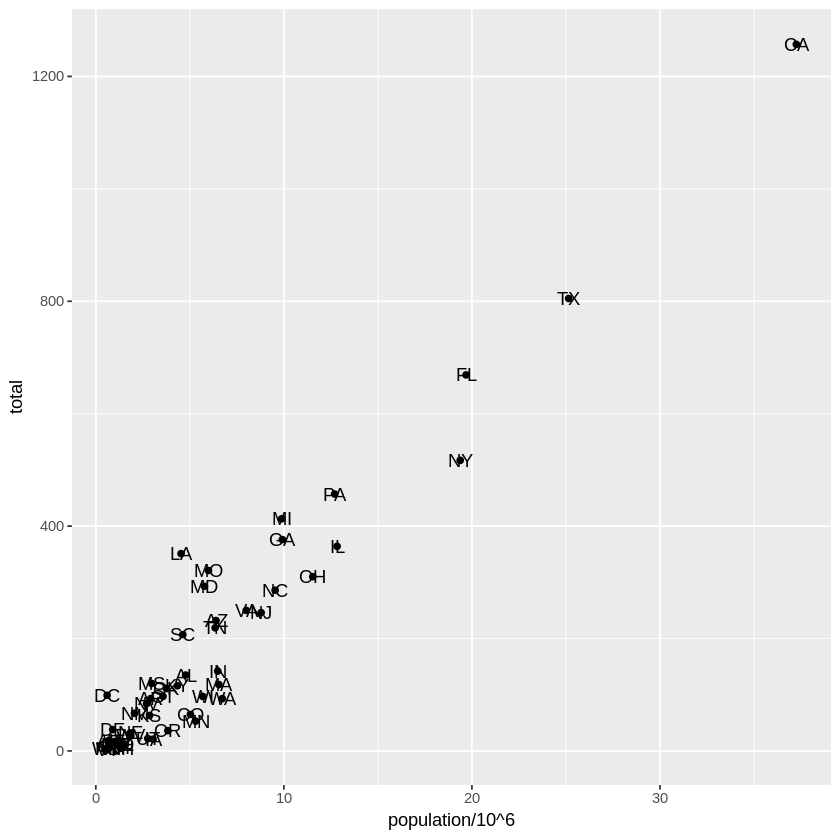

In [13]:
murders %>% ggplot() +
    geom_point(aes(x=population/10^6, y=total)) +
    geom_text(aes(x=population/10^6, y=total, label=abb))

### Tinkering

If we read the documentation of geometry functions, we'll see that each of them has many arguments other than _data_ and _aes_. They tend to be specific for each function.

For example, in the plot we wish to make, the points must be larger than the default ones. In the help file of the *geom_function*, we see that the _size_ is an aesthetic and we can change it using the following code:

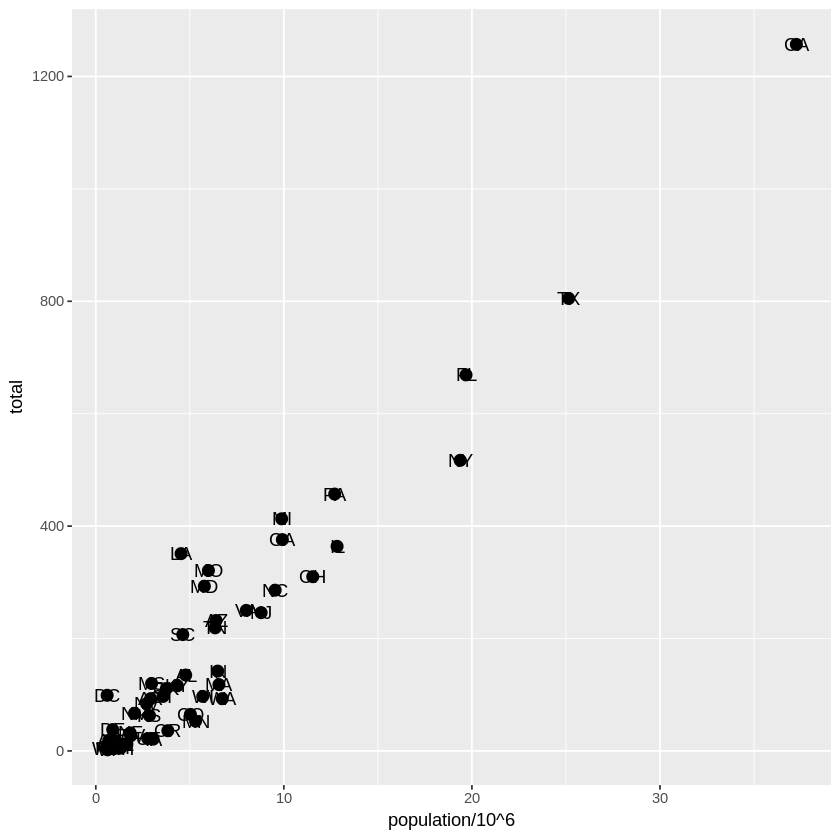

In [15]:
murders %>% ggplot() +
    geom_point(aes(x=population/10^6, y=total), size=3) +
    geom_text(aes(x=population/10^6, y=total, label=abb))

One very impotant thing to note in the last code cell is that we changed the dots size, but included the _size_ argument outside the _aes_ function. The reason for that is because, in this case, the size is not a mapping, it affects all the points the same.

Unfortunately, now that the points are larger, we can't see the labels. If we read the documentation of the *geom_text* function, we'll see that the arguments *nudge_x* and *nudge_y* lets us move the labels. To make our labels readable again, we'll add the *nudge_x* argument so that the labels are moved a little bit to the right:

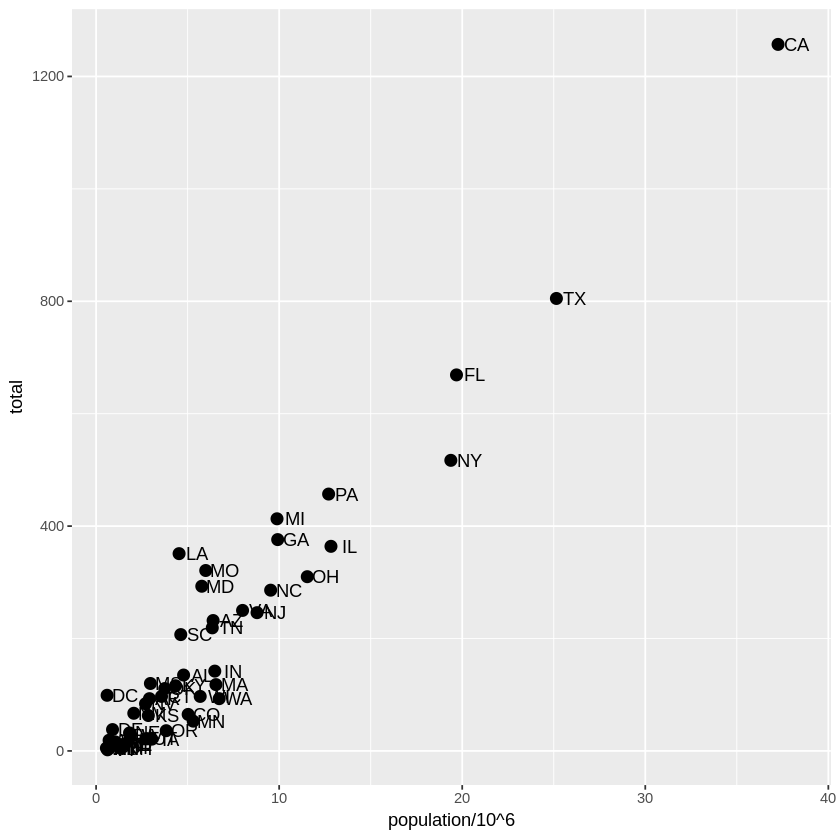

In [18]:
murders %>% ggplot() +
    geom_point(aes(x=population/10^6, y=total), size=3) +
    geom_text(aes(x=population/10^6, y=total, label=abb), nudge_x=1)

Note that in the previous code cells, we have been mapping population and total to the points twice, once for each layer. We can avoid this by adding what we call a _global aesthetic mapping_. If we read the help file of the _ggplot_ function, we'll see that it also contains an argument that permits us to define the aesthetic mappings. If we define a mapping in the _ggplot_ function, then all the layers that are added will default to this mapping:

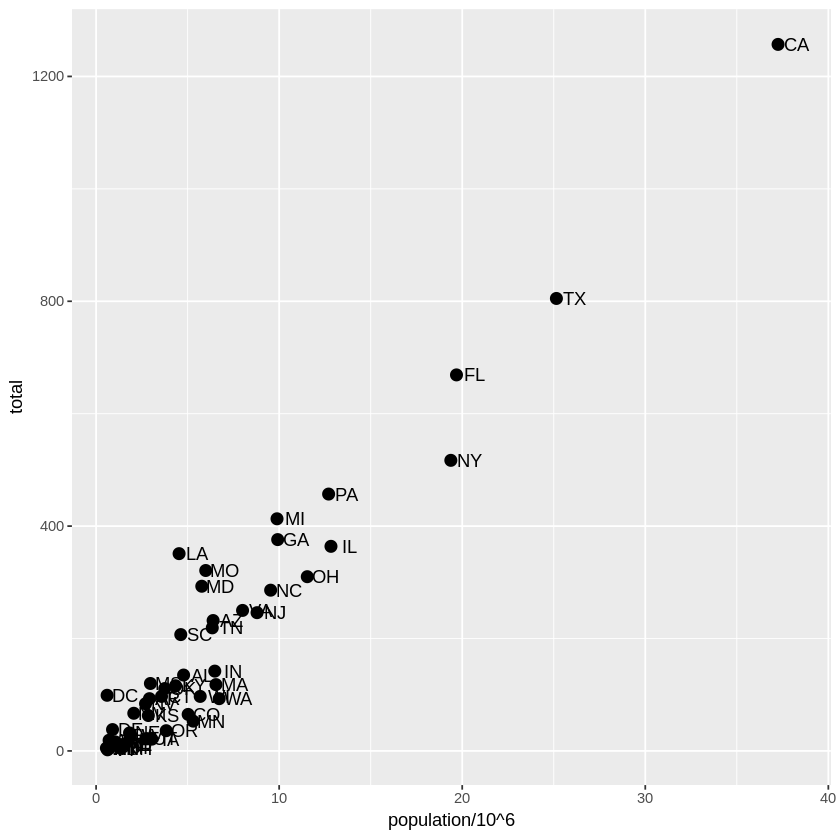

In [19]:
murders %>% ggplot(aes(x=population/10^6, y=total)) +
    geom_point(size=3) +
    geom_text(aes(label=abb), nudge_x=1)

To make our life easier, we'll redefine the `p` object:

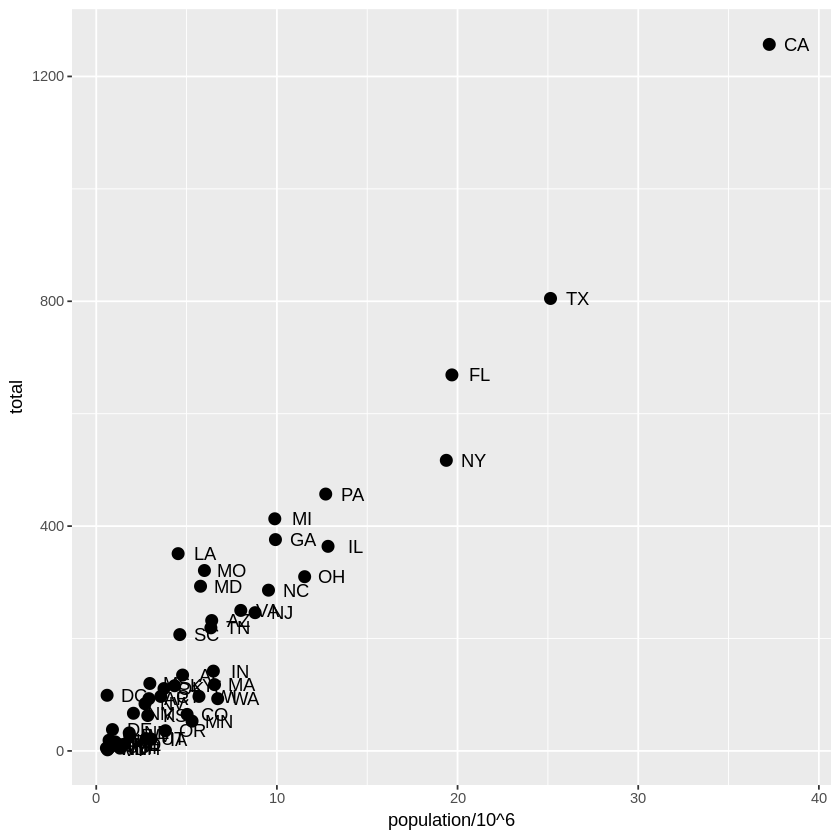

In [24]:
p <- ggplot(data=murders, aes(x=population/10^6, y=total, label=abb))
p + geom_point(size=3) + 
    geom_text(nudge_x=1.5)

It is important to say, at this point, that the local mappings override the global ones. This is important in situations where we need to override the global mappings. Here's an example:

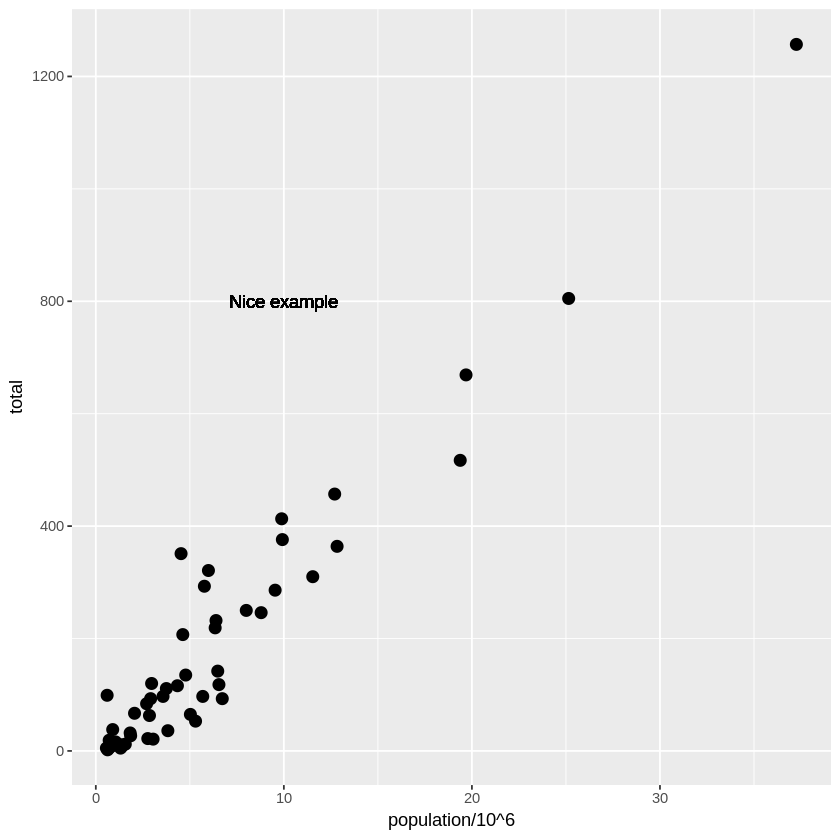

In [26]:
p + geom_point(size=3) + 
    geom_text(aes(x=10, y=800, label='Nice example'))

Observe that the only label assigned by the new aesthetic mapping is shown in the graph, and we no longer see the states abbreviations (instead we see phrase "Nice example"). This flexibility of being able to redefine mappings in each layer will prove to be very useful later.

### Scales, Labels and Colors

In this part of the notebook, we'll demonstrate how to adjust the scales and labels, and how to add some color and a line to our graph.

The first thing we'll do is to change the scales, since we want it to be in the log scale and this is not the default. A quick look at the cheat sheet and we'll see we can use the functions *scale_x_log10* and *scale_y_log10* to achieve what we want:

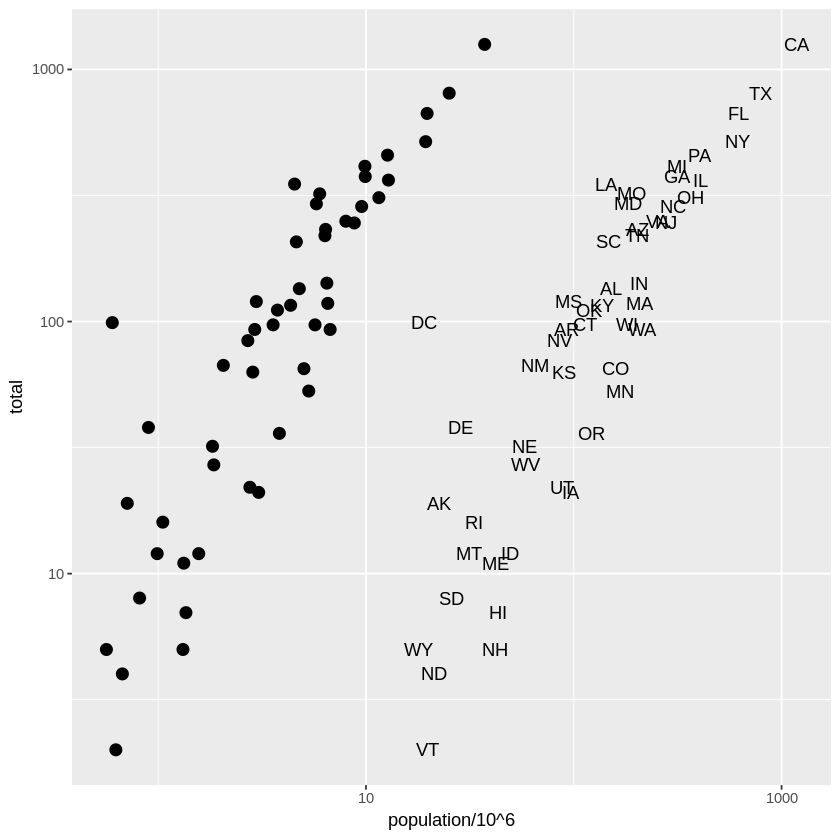

In [31]:
p + geom_point(size=3) + 
    geom_text(nudge_x=1.5) +
    scale_x_log10() +
    scale_y_log10()

As we can see above, labels are not in a nice position as they were before. That's because we changed the scales in the graph. Below, we set a proper value to the *nudge_x* argument in the *geom_text* function:

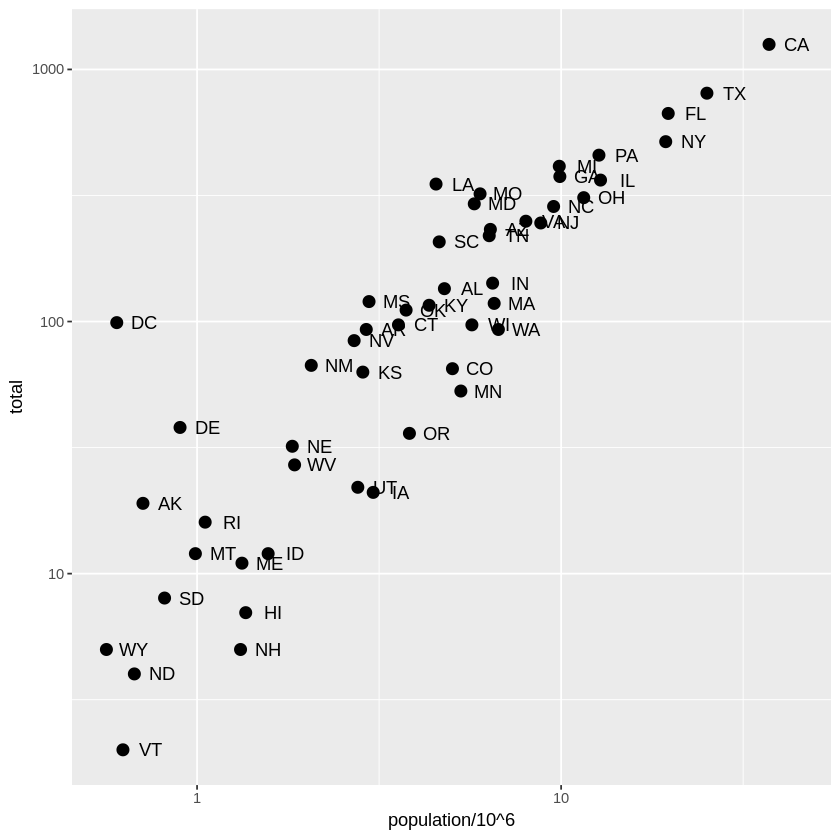

In [33]:
p + geom_point(size=3) +
    geom_text(nudge_x=0.075) +
    scale_x_log10() +
    scale_y_log10()

Again, we'll head to our cheat sheet to find out how to include labels and a title in our graph. We'll use the *xlab*, *ylab* and *ggtitle* functions to achieve what we want:

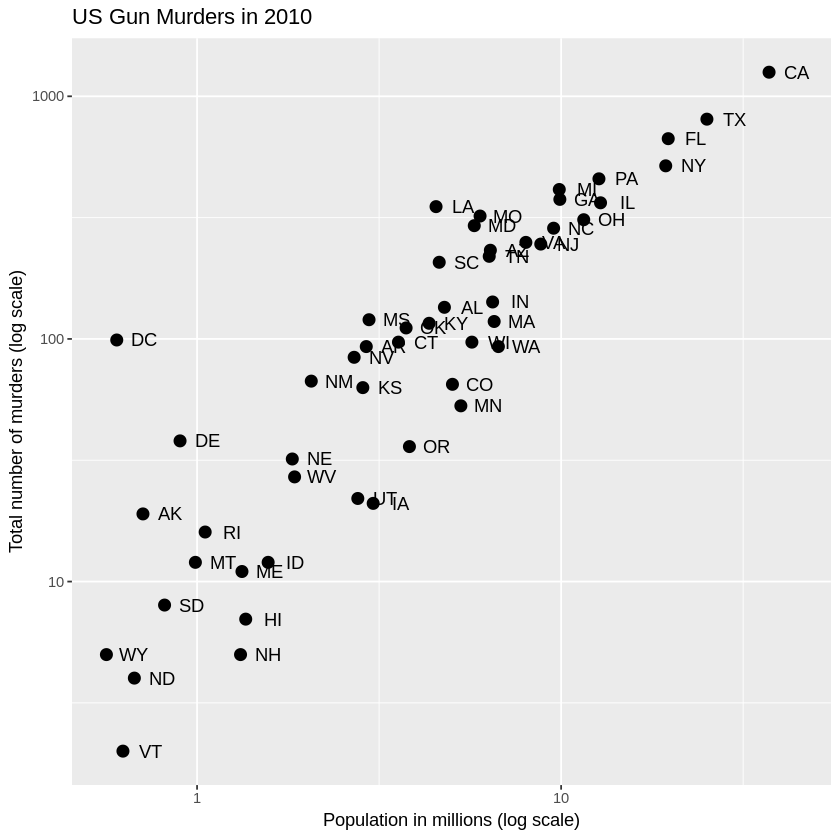

In [34]:
p + geom_point(size=3) +
    geom_text(nudge_x=0.075) +
    scale_x_log10() +
    scale_y_log10() +
    xlab('Population in millions (log scale)') +
    ylab('Total number of murders (log scale)') +
    ggtitle('US Gun Murders in 2010')

We still have to add color, legend and some optional changes to the style. Again, we'll search in the cheat sheet what to include in the code so we have some color.

The *geom_point* function has an argument called _color_, which we'll use to add color to our graph. To facilitate the exposition of how we do this, we'll redefine the object `p` to be everything except the scatterplot layer:

In [36]:
p <- murders %>% ggplot(aes(x=population/10^6, y=total, label=abb)) +
    geom_text(nudge_x=0.075) +
    scale_x_log10() + 
    scale_y_log10() + 
    xlab('Population in millions (log scale)') + 
    ylab('Total number of murders (log scale)') +
    ggtitle('US Gun Murders in 2010')

Now we can make all the points blue by simply adding the _color_ argument to our geometry layer:

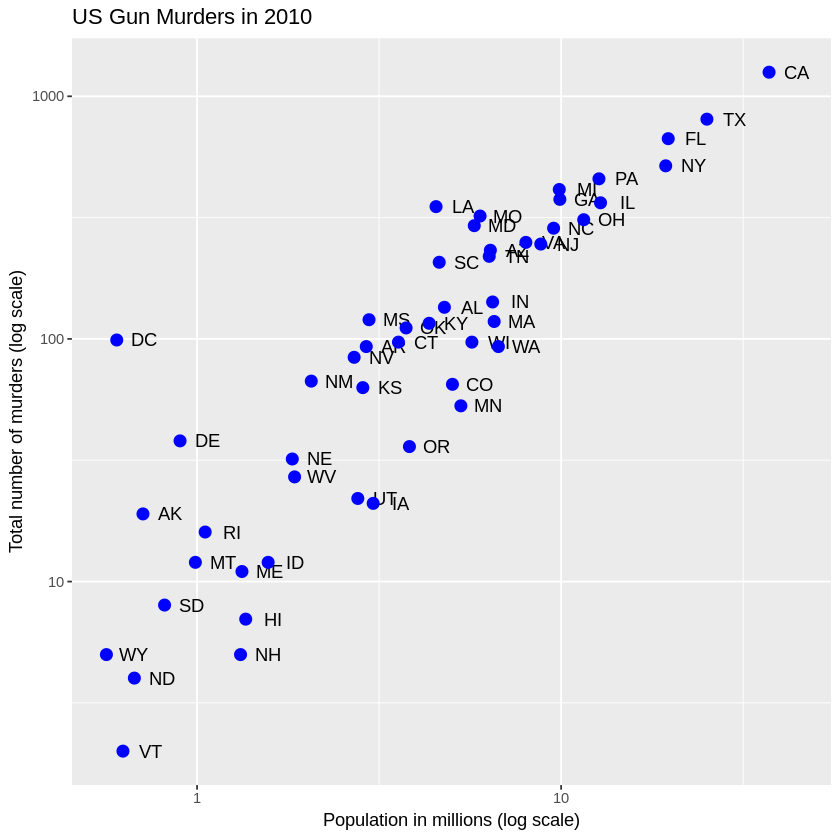

In [37]:
p + geom_point(size=3, color='blue')

To achieve what we described in the beginning of this notebook, we need to have the colors associated with some geographical region. A nice behavior of ggplot lets us do this: if we assign a categorical variable to the _color_ argument, it automatically assigns a different color to each category, and it also adds a legend. Note that because the color of each point will depend on the category (that is, on the region from which state is), we have to use a mapping. We'll do this using the _aes_ function:

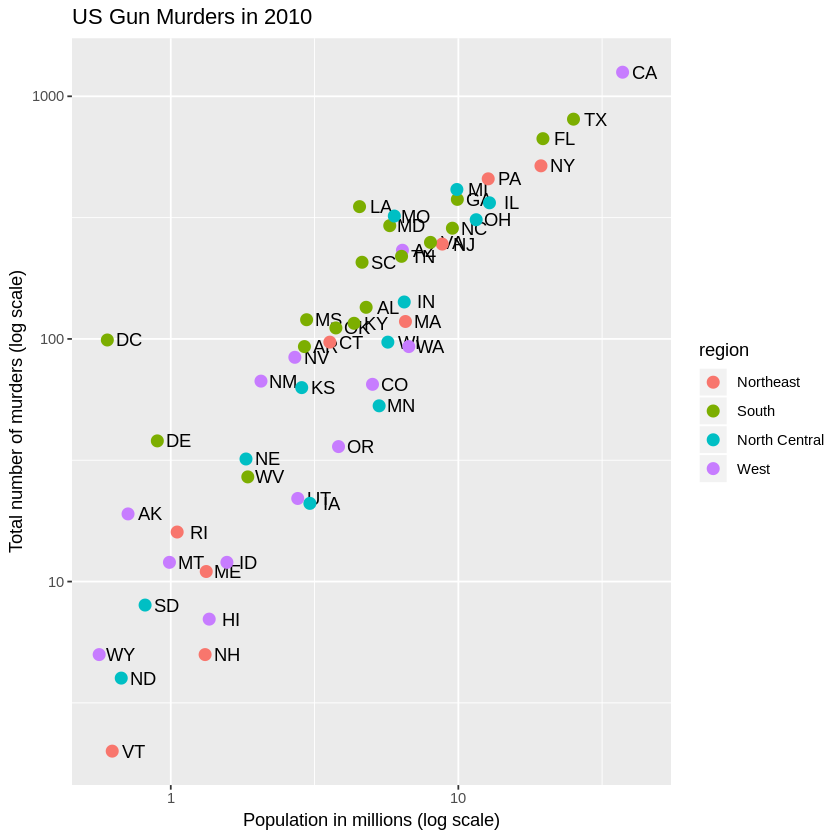

In [39]:
p + geom_point(aes(color=region), size=3)

The next thing to do is to add a line that represents the average murder rate for the entire country. Note that if we determine the per million rate to be $r$ for the entire country, the line we want will be defined by the equation $y = rx$.

To compute the average rate for the entire country, we can use _dplyr_ as follows:

In [40]:
r <- murders %>% summarize(rate=sum(total)/sum(population)*10^6) %>%
    .$rate

To add a line, we can use the *geom_abline* function (ggplot uses _ab_ in the name of the function to remind us that we're supplying the intercept _a_ and the slope _b_). The default line has slope 1 and intercept 0, so we only have to define the intercept:

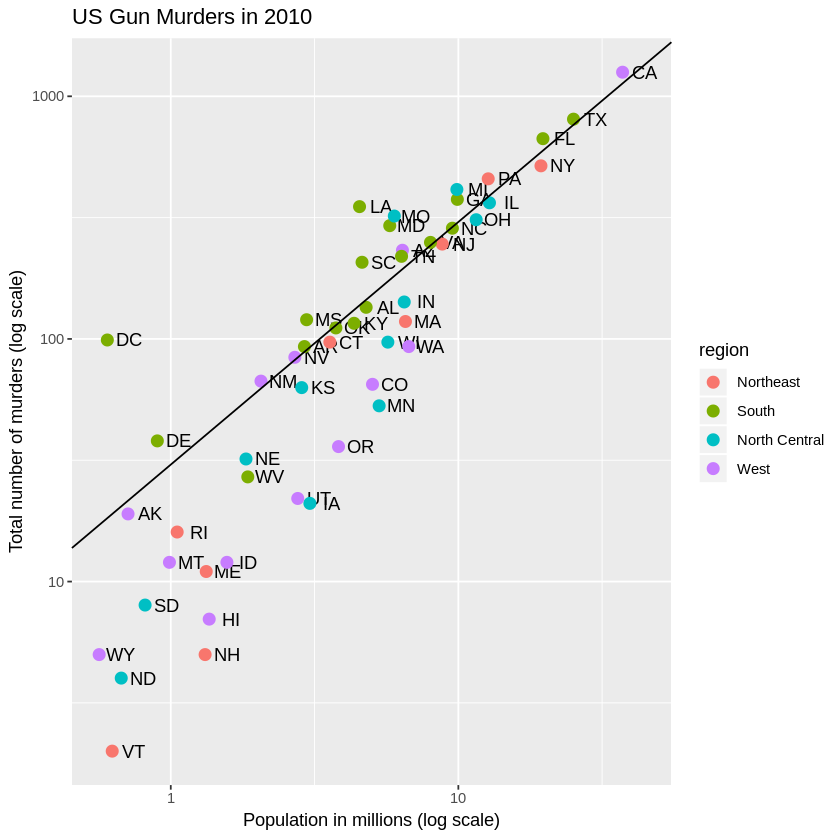

In [42]:
p + geom_point(aes(color=region), size=3) + 
    geom_abline(intercept=log10(r))

To make the plot easier to see, we have to change the line type, change its color and also draw the line before the points (because otherwise the line goes over the points and the state abbreviations). In the code cell below, we add the layers to `p` in a different order and uses the necessary arguments to achieve what we want:

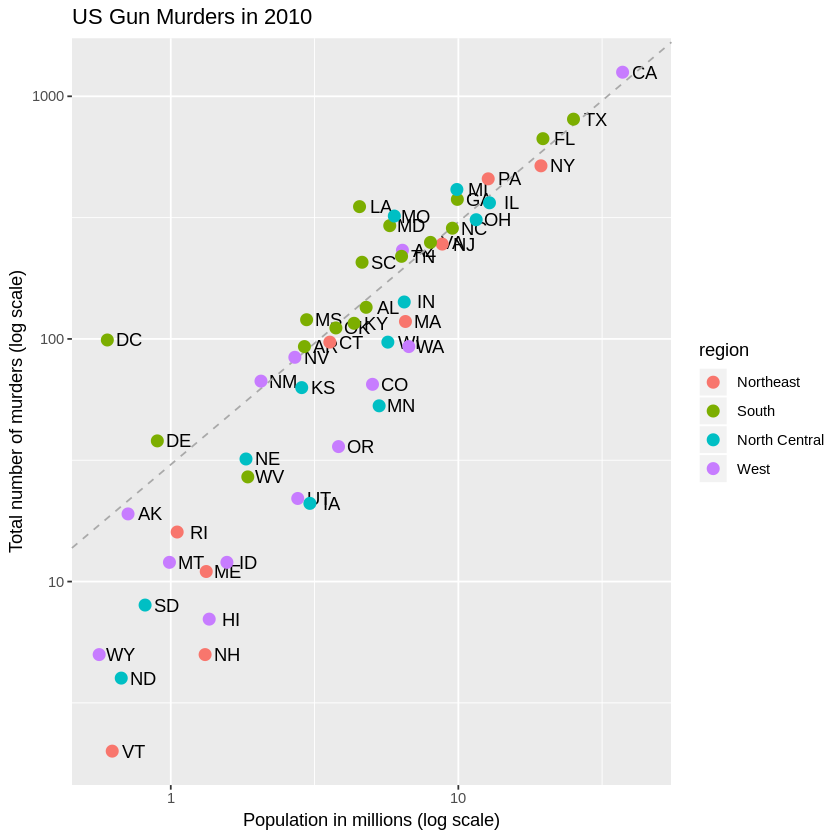

In [43]:
# lty argument in geom_abline changes the line type to dashed
p + geom_abline(intercept=log10(r), lty=2, color='darkgrey') +
    geom_point(aes(color=region), size=3)

The default behavior of ggplot is quite useful, but often we need to make some minor changes to it. Although it's not obvious how to make this even after reading the documentation, keep in mind that ggplot is very flexible and there's almost always a way to achieve what you want.

For example, if we want to capitalize the title of the legend, we'll probably have to google what to do. After some research, we'll discover that the function *scale_color_discrete* has an argument that let us change the title of the legend in our graph:

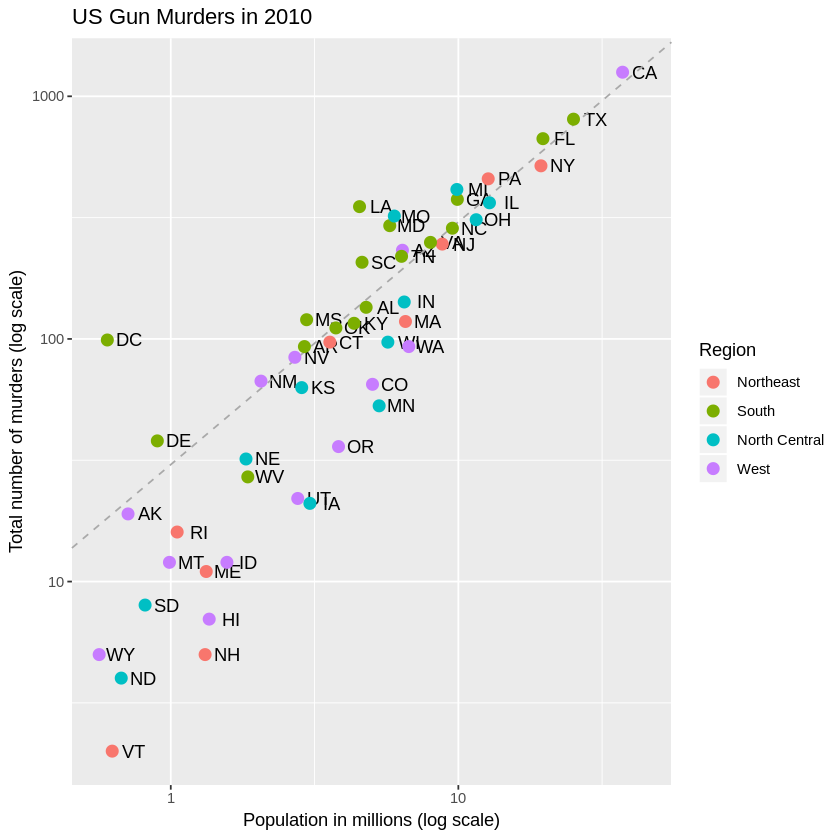

In [44]:
p + geom_abline(intercept=log10(r), lty=2, color='darkgrey') +
    geom_point(aes(color=region), size=3) +
    scale_color_discrete(name='Region')

To make the graph looks even more astonishing, we can use some add-on packages, that is, some functionality coming from outside ggplot.

### Add-on Packages